# Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

Why do we need?
Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets, and have recently been used to win many Kaggle data science competitions.

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from pprint import pprint

In [2]:
cleaned = pd.read_csv('../3.Preprocessing/cleaned_dataset.csv')
cleaned["attack_cat"]


0            Normal
1            Normal
2            Normal
3            Normal
4            Normal
            ...    
257668      Generic
257669    Shellcode
257670      Generic
257671      Generic
257672      Generic
Name: attack_cat, Length: 257673, dtype: object

In [3]:
cleaned = pd.get_dummies(cleaned,columns= ['attack_cat'])

In [4]:
Y = cleaned['label']
X = cleaned.drop(['label'],axis=1)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size=0.3, random_state = 0) 

In [6]:
X_train

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
160571,3.716548,34,108,1558,125730,37.938431,62,252,3.256786e+03,268132.687500,...,0,0,0,1,0,0,0,0,0,0
3992,0.000009,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000,...,0,0,0,1,0,0,0,0,0,0
110524,0.688233,54,42,37938,3380,138.034645,31,29,4.328302e+05,38359.101560,...,0,0,0,0,0,0,1,0,0,0
256499,0.000009,2,0,134,0,111111.107200,62,0,5.955555e+07,0.000000,...,0,0,0,1,0,0,0,0,0,0
68086,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,1.969178,12,10,1038,844,10.664348,254,252,3.867604e+03,3087.582764,...,0,0,0,0,1,0,0,0,0,0
117952,0.519435,52,40,37492,3276,175.190355,31,29,5.663231e+05,49207.312500,...,0,0,0,0,0,0,1,0,0,0
173685,0.000009,2,0,180,0,111111.107200,254,0,8.000000e+07,0.000000,...,0,0,0,0,1,0,0,0,0,0
43567,0.000009,2,0,104,0,111111.107200,254,0,4.622222e+07,0.000000,...,0,0,0,0,0,0,1,0,0,0


In [7]:
 #Create a GradientBoostingClassifier Classifier
model = GradientBoostingClassifier(learning_rate=0.5, max_depth=3)

In [8]:
print('Parameters currently in use:\n')
print(model.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [9]:
model.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.5)

In [10]:
y_pred = model.predict(X_test)

In [11]:
X_test.shape

(77302, 206)

AttributeError: module 'matplotlib' has no attribute 'title'

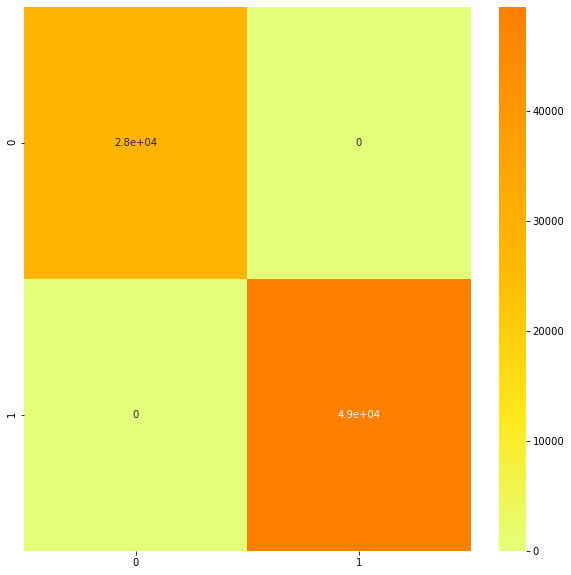

In [13]:
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True, cmap = "Wistia")
plt.title('Confusion Matrix for Logistic Regression', fontsize= 15)
plt.show()
#print("Confusion Matrix:")
#print(confusion_matrix(y_test, predictions))

In [16]:
print("Classification Report")
print(classification_report(Y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27892
           1       1.00      1.00      1.00     49410

    accuracy                           1.00     77302
   macro avg       1.00      1.00      1.00     77302
weighted avg       1.00      1.00      1.00     77302



In [ ]:
prediction = model.predict((np.array([[40,330,220]])))
print("T", prediction)

In [17]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../1.Dataset/Dataset_and_its_Cleaning.ipynb
	modified:   ../3.Preprocessing/pre_processing.ipynb
	modified:   DecisionTree.ipynb
	modified:   GradientBoosterClassifer.ipynb
	modified:   RandomForest.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../1.Dataset/1.Dataset.7z
	../1.Dataset/cleaned_dataset.csv
	../3.Preprocessing/cleaned_dataset.csv
	../3.Preprocessing/data_minmax
	../3.Preprocessing/dataset_minmax_corr.csv
	../3.Preprocessing/dataset_minmax_pca.csv

no changes added to commit (use "git add" and/or "git commit -a")
